### Colocalisation simulations

Pedro VR

2020 05 09


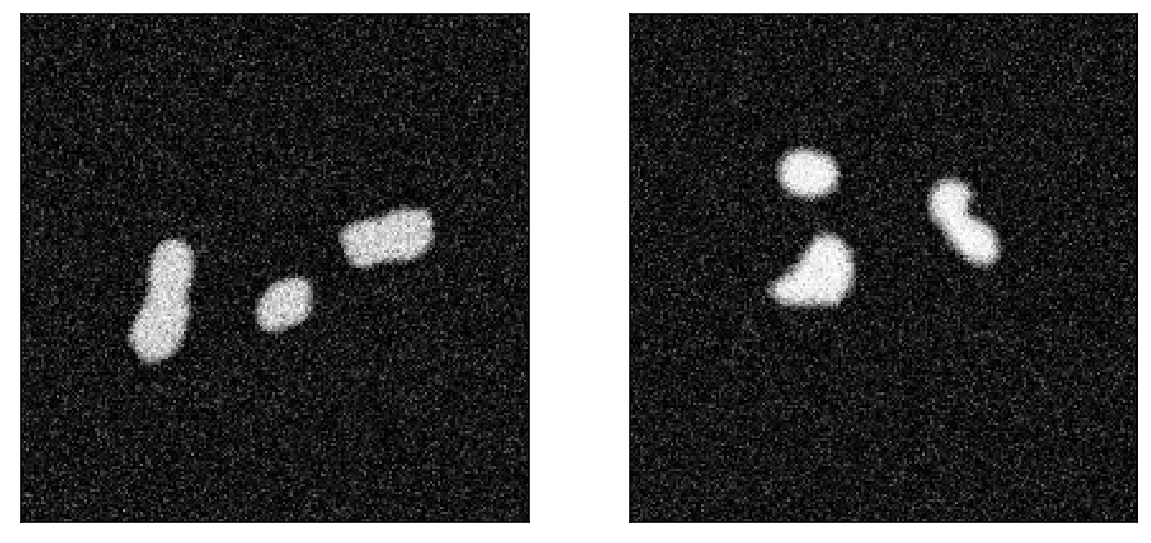

In [182]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from matplotlib import cm

%config InlineBackend.figure_format = 'retina'

# function for generating subplots of two images with a colorbar

def make_subplots(im1,im2):
    fig, ax = plt.subplots(1,2,figsize=(10,6))
    img1 = ax[0].imshow(im1,cmap=cm.Greys_r)
    img2 = ax[1].imshow(im2,cmap=cm.Greys_r)
    
    # remove the x and y ticks
    for axes in ax:
        axes.set_xticks([])
        axes.set_yticks([])
    
    # create axes for colorbar
   # cax = fig.add_axes([ax[1].get_position().x1+0.01,
   #                     ax[1].get_position().y0,
   #                     0.02,
   #                     ax[0].get_position().y1-ax[1].get_position().y0])
   # fig.colorbar(img2, cax=cax)
    plt.show()

# simulate a few blobs, with two of them overlapping 

# used Fiji's blobs image to create a mask with some random blobs
# created a binary mask with only two overlapping blobs
# subtracted 50 and 100 gray levels from each image respectively, to simulate different intensitieis
# added a 2-pixel gaussian blur to each image
# added noise

# import noisy, grey level images
im1 = io.imread('/Users/pedrovallejo/OneDrive - University Of Cambridge/lag/phd/thesis/colocalisation simulation/im1_blur_200pix_noise.tif')
im2 = io.imread('/Users/pedrovallejo/OneDrive - University Of Cambridge/lag/phd/thesis/colocalisation simulation/im2_blur_200pix_noise.tif')

# show raw data
make_subplots(im1,im2)

### Threshold using Otsu's method

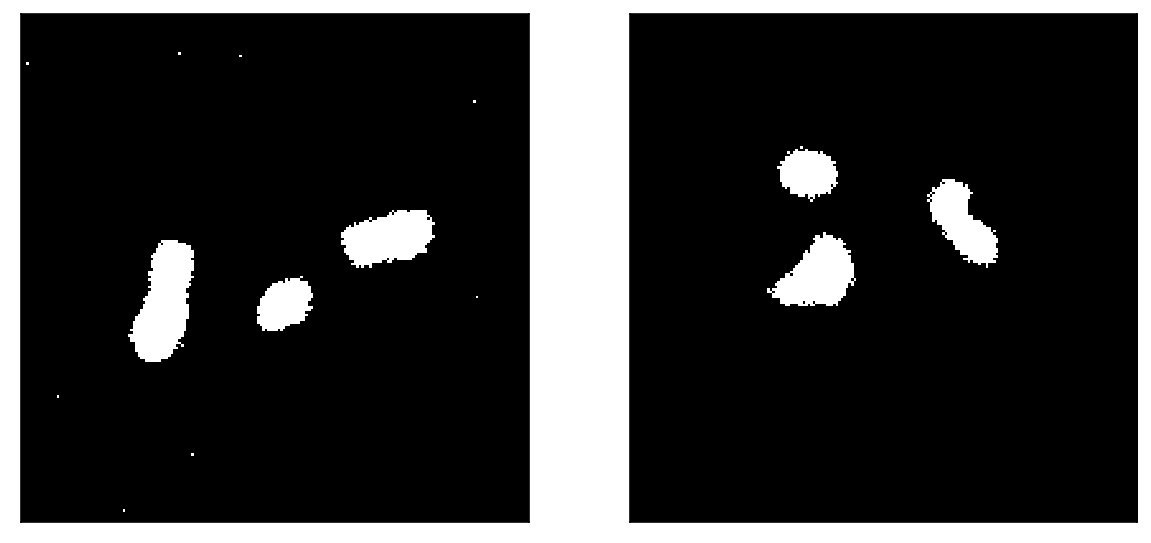

In [183]:
from skimage.filters import threshold_otsu

t1 = threshold_otsu(im1)
t2 = threshold_otsu(im2)

im1_mask = im1>t1
im2_mask = im2>t2

fig, ax  = plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(im1_mask,cmap=cm.Greys_r)
ax[1].imshow(im2_mask,cmap=cm.Greys_r)
# remove the x and y ticks
for axes in ax:
    axes.set_xticks([])
    axes.set_yticks([])


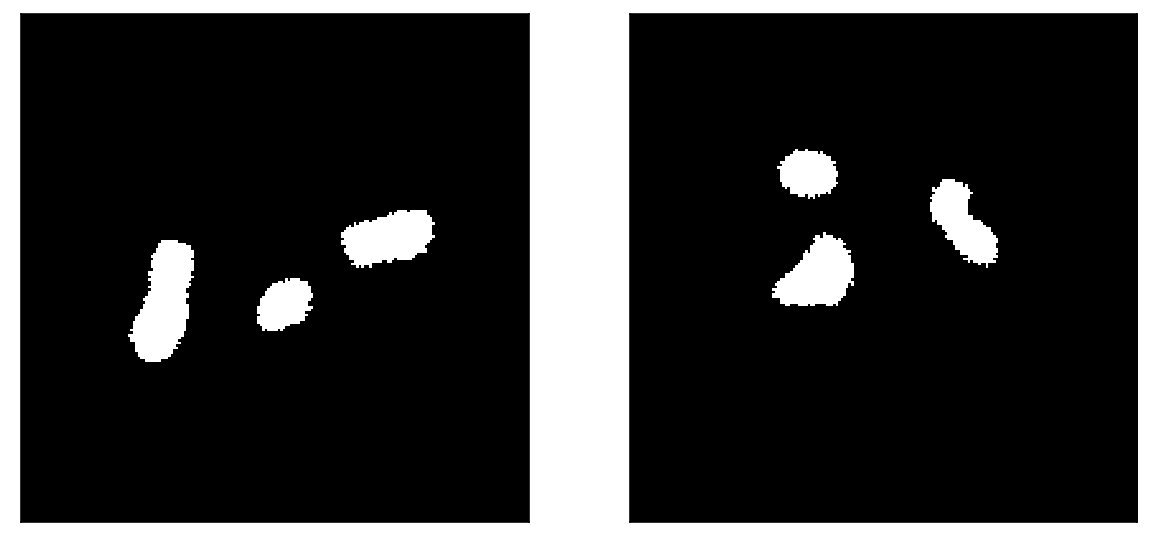

In [184]:
# remove small objects and holes using morphological operations
# source: https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.remove_small_objects
from skimage import morphology
from mpl_toolkits.axes_grid1 import make_axes_locatable

im1_morph = morphology.remove_small_objects(im1_mask,5)
im2_morph = morphology.remove_small_objects(im2_mask,5)

# remove holes in the objects found
im1_open = morphology.remove_small_holes(im1_morph,2)
im2_open = morphology.remove_small_holes(im2_morph,2)

# turn boolean images into integers for plotting
im1_open = np.multiply(im1_open, 1)
im2_open = np.multiply(im2_open, 1)

make_subplots(im1_open,im2_open)

1


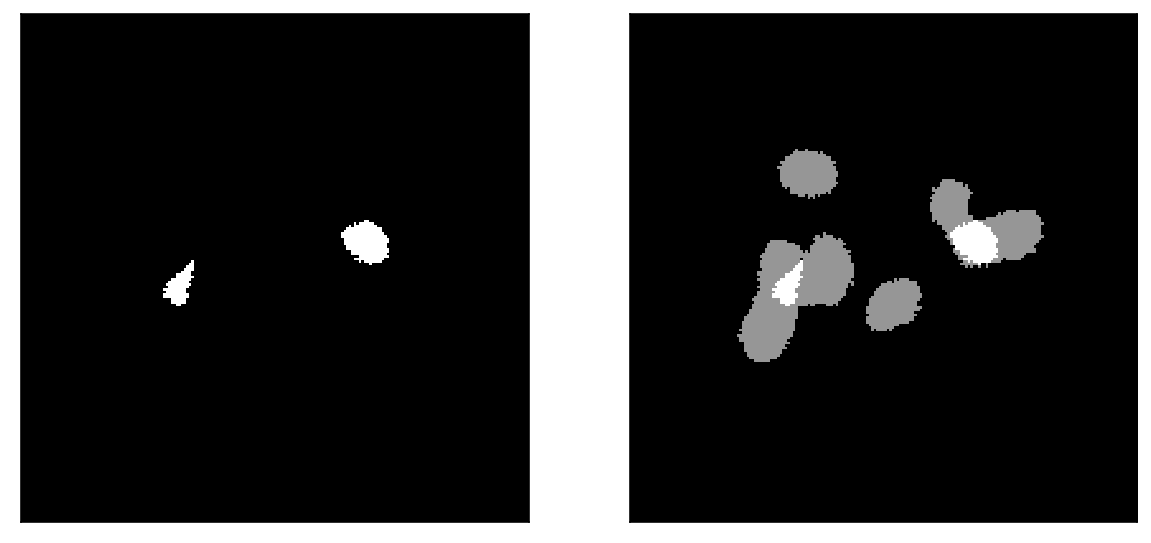

In [185]:
# get the intersection and the union of the two images
im_intersect = im1_open*im2_open
im_union = (im1_open+im2_open)
#im_union = np.multiply(im_union > 0, 1)

print(np.max(im2_open))


make_subplots(im_intersect,im_union)

In [172]:
# now calculate the percentage of intersection per area for each blob
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd

label_img1 = label(im1_open)
label_img2 = label(im2_open)

#make_subplots(label_img1,label_img2)

props1 = regionprops_table(label_img1, properties=('centroid','area'))
props2 = regionprops_table(label_img2, properties=('centroid','area'))

props_tab1 = pd.DataFrame(props1)
props_tab1['channel'] = 1
props_tab2 = pd.DataFrame(props2)
props_tab2['channel'] = 2
pd.concat([props_tab1,props_tab2])

# I need the total area of intersection, the total area in channel 1 and 2, and the intersection area

# area ch1 and ch2
area_1 = np.sum(im1_open)
area_2 = np.sum(im2_open)
area_intersection = np.sum(im_intersect)
area_union = np.sum(im_union)
 
coloc_1 = area_intersection/area_1
coloc_2 = area_intersection/area_2
coloc_overall = area_intersection/area_union

print(coloc_1)
print(coloc_2)
print(coloc_overall)

0.19769452449567723
0.23835997220291869
0.12115860120098905
